In [142]:
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential,activations
from tensorflow.keras.layers import Dense,LSTM,Reshape,Dropout,InputLayer,Flatten,Input,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard , ModelCheckpoint
import pathlib

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

In [143]:
df = pd.read_csv('data/sp100_indicator_1990.csv')
df.pop('Unnamed: 0')

date_time = pd.to_datetime(df.pop('Date'),
                           format='%Y.%m.%d')

timestamp_s = date_time.map(pd.Timestamp.timestamp)
df['Time']= timestamp_s
# timestamp_s = timestamp_s.map(pd.Timestamp.normalize)
# timestamp_s = pd.Timestamp(date_time)
df


,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_20,SMA_50,SMA_100,...,DON_CHIAN_hband,DON_CHIAN_lband,DON_CHIAN_mband,DON_CHIAN_pband,VWAP,ADX_Pos,ADX_Neg,Aroon,MFI,Time
0,164.675003,168.074997,164.029999,168.074997,168.074997,324140000,162.876001,163.465250,160.784400,161.535300,...,168.074997,159.544998,163.809998,1.000000,163.367909,37.050097,18.487196,88.0,65.297013,6.312384e+08
1,168.074997,168.419998,167.229996,167.695007,167.695007,384660000,163.490501,163.644001,160.894800,161.595200,...,168.419998,159.544998,163.982498,0.918311,163.626961,36.638828,17.543687,88.0,65.586938,6.313248e+08
2,167.695007,167.695007,164.934998,166.419998,166.419998,354000000,164.029501,163.800251,161.002300,161.659900,...,168.419998,159.544998,163.982498,0.774648,163.669121,32.496377,24.961459,88.0,57.587335,6.314112e+08
3,166.419998,166.595001,164.410004,164.774994,164.774994,317060000,164.431500,163.890751,161.081400,161.712800,...,168.419998,159.544998,163.982498,0.589295,163.689985,29.639379,24.879322,28.0,58.094088,6.314976e+08
4,164.774994,166.119995,164.009995,165.889999,165.889999,280220000,164.887500,164.039001,161.196200,161.766000,...,168.419998,159.544998,163.982498,0.714930,163.778513,27.156450,24.383266,28.0,67.311771,6.317568e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,2117.540039,2117.540039,2095.469971,2111.699951,2111.699951,3395780000,2155.818994,2143.689990,2123.773198,2080.457094,...,2196.340088,2074.929932,2135.635010,0.302858,2139.333549,19.306672,27.793805,28.0,39.508188,1.639958e+09
8056,2123.580078,2147.030029,2112.060059,2145.979980,2145.979980,2564370000,2154.006982,2142.815991,2126.607197,2081.799393,...,2191.189941,2074.929932,2133.059937,0.611131,2141.254205,24.400998,25.587079,28.0,46.003816,1.640045e+09
8057,2147.370117,2170.709961,2144.620117,2169.989990,2169.989990,2439570000,2153.967993,2143.006995,2130.088198,2083.412194,...,2191.189941,2074.929932,2133.059937,0.817651,2144.944537,28.342309,24.067435,28.0,52.461923,1.640131e+09
8058,2172.469971,2189.979980,2172.469971,2183.219971,2183.219971,2194630000,2156.613989,2143.630493,2133.714797,2085.001094,...,2191.189941,2074.929932,2133.059937,0.931447,2150.704121,31.521640,22.943092,64.0,59.305448,1.640218e+09


In [144]:
# timestamp_s = date_time.map(pd.Timestamp.timestamp)
# timestamp_s
# year = 365.2425
# df['1 Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
# df['1 Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [145]:
# twoYear = year * 2
# threeYear = year * 3
# fourYear = year *4
# fiveYear = year *5
# sixYear = year *6
# sevenYear = year *7
# eightYear = year *8
# nineYear = year *9
# tenYear = year *10
# twentyYear = year *20
# fortyYear = year * 40

In [146]:

# df['2 Year sin'] = np.sin(timestamp_s * (2 * np.pi / twoYear))
# df['2 Year cos'] = np.cos(timestamp_s * (2 * np.pi / twoYear))
# df['3 Year sin'] = np.sin(timestamp_s * (2 * np.pi / threeYear))
# df['3 Year cos'] = np.cos(timestamp_s * (2 * np.pi / threeYear))
# df['4 Year sin'] = np.sin(timestamp_s * (2 * np.pi / fourYear))
# df['4 Year cos'] = np.cos(timestamp_s * (2 * np.pi / fourYear))
# df['5 Year sin'] = np.sin(timestamp_s * (2 * np.pi / fiveYear))
# df['5 Year cos'] = np.cos(timestamp_s * (2 * np.pi / fiveYear))
# df['6 Year sin'] = np.sin(timestamp_s * (2 * np.pi / sixYear))
# df['6 Year cos'] = np.cos(timestamp_s * (2 * np.pi / sixYear))
# df['7 Year sin'] = np.sin(timestamp_s * (2 * np.pi / sevenYear))
# df['7 Year cos'] = np.cos(timestamp_s * (2 * np.pi / sevenYear))
# df['8 Year sin'] = np.sin(timestamp_s * (2 * np.pi / eightYear))
# df['8 Year cos'] = np.cos(timestamp_s * (2 * np.pi / eightYear))
# df['9 Year sin'] = np.sin(timestamp_s * (2 * np.pi / nineYear))
# df['9 Year cos'] = np.cos(timestamp_s * (2 * np.pi / nineYear))
# df['10 Year sin'] = np.sin(timestamp_s * (2 * np.pi / tenYear))
# df['10 Year cos'] = np.cos(timestamp_s * (2 * np.pi / tenYear))
# df['20 Year sin'] = np.sin(timestamp_s * (2 * np.pi / twentyYear))
# df['20 Year cos'] = np.cos(timestamp_s * (2 * np.pi / twentyYear))
# df['40 Year sin'] = np.sin(timestamp_s * (2 * np.pi / fortyYear))
# df['40 Year cos'] = np.cos(timestamp_s * (2 * np.pi / fortyYear))

# df.head()

In [147]:
# plot_cols = ['1 Year sin','2 Year sin','3 Year sin','4 Year sin','5 Year sin','6 Year sin','7 Year sin','8 Year sin','9 Year sin','10 Year sin','20 Year sin','40 Year sin']
# plot_features = df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

In [ ]:
# fft = tf.signal.rfft(df['Close'])
# f_per_dataset = np.arange(0, len(fft))

# n_samples_h = len(df['Close'])

# hours_per_year = 365.2524
# years_per_dataset = n_samples_h/(hours_per_year)

# f_per_year = f_per_dataset/years_per_dataset
# plt.step(f_per_year, np.abs(fft))
# plt.xscale('log')

# _ = plt.xlabel('Frequency')

In [ ]:
# ipa = np.arange(0,10000)
# sin = np.sin(ipa)

# fft = tf.signal.rfft(sin)
# f_per_dataset = np.arange(0, len(fft))

# n_samples_h = len(sin)

# hours_per_year = 365.2524
# years_per_dataset = n_samples_h/(hours_per_year)

# f_per_year = f_per_dataset/years_per_dataset
# plt.step(f_per_year, np.abs(fft))
# plt.xscale('log')

# _ = plt.xlabel('Frequency')

In [194]:
class dataProcessing():

    def __init__(self ,data,input_width ,prediction_days , label_columns , stockname):

        self.stockname = stockname
        self.input_width = input_width
        self.prediction_days = prediction_days
        self.label_columns = label_columns
        self.data = data

        self.column_indices = {name: i for i, name in enumerate(data.columns)}
        self.num_features = data.shape[1]
        
        #slit into test,validation and train data
        n = len(data)
        self.train_dataset = data[:int(0.95 * n)]
        # self.val_dataset = data[-200:-100]
        self.test_dataset = data[int(0.95 * n):]
        
        #reset indecies

        # self.val_dataset = self.val_dataset.reset_index()
        # self.val_dataset.pop('index')
        self.test_dataset = self.test_dataset.reset_index()
        self.test_dataset.pop('index')
        

        #Normalizing The Data

        self.train_std = self.train_dataset.std()  
        self.train_mean = self.train_dataset.mean()
        
        self.train_dataset = (self.train_dataset - self.train_mean) / self.train_std
        # self.val_dataset = (self.val_dataset - self.train_mean) / self.train_std
        self.test_dataset = (self.test_dataset - self.train_mean) / self.train_std

    def plot_normalized_data(self):
        data_std = (self.data - self.train_mean) / self.train_std
        data_std = data_std.melt(var_name='Column', value_name='Normalized')
        plt.figure(figsize=(12, 6))
        ax = sns.violinplot(x='Column', y='Normalized', data=data_std)
        _ = ax.set_xticklabels(self.data.keys(), rotation=90)

    def make_windows(self,data:pd.core.frame.DataFrame):
        
        window_input = []
        window_output=[]

        for i in range(self.input_width,len(data)-self.prediction_days):

            
            window_input.append(data[i-self.input_width:i].reset_index())
            window_output.append(data[self.label_columns][i:i+self.prediction_days].reset_index())

            window_input[-1].pop('index')
            window_output[-1].pop('index')
            
            #convert pd.DataFrame to numpy
            window_input[-1]= window_input[-1].to_numpy() 
            window_output[-1]= window_output[-1].to_numpy() 

        #convert list to numpy
        window_input = np.asarray(window_input)
        window_output = np.asarray(window_output)

        return window_input,window_output  

    def test(self, model,test_data):

        x_test , y_test = self.make_windows(test_data)

        predicted_prices=model.predict(x_test)

        for i in range(len(self.label_columns)):
            predicted_prices[:,:,i]=(predicted_prices[:,:,i]*self.train_std[self.label_columns[i]])+self.train_mean[self.label_columns[i]]
            y_test[:,:,i]=(y_test[:,:,i]*self.train_std[self.label_columns[i]])+self.train_mean[self.label_columns[i]]        

        return predicted_prices , y_test
        

    # def test(self,model,test_data):

    #     predicted_prices=model.predict(test_data)

    #     for i in range(len(self.label_columns)):
    #         predicted_prices[:,:,i]=(predicted_prices[:,:,i]*self.train_std[self.label_columns[i]])+self.train_mean[self.label_columns[i]]
    #         y_test[:,:,i]=(y_test[:,:,i]*self.train_std[self.label_columns[i]])+self.train_mean[self.label_columns[i]]        

    #     return predicted_prices , y_test
        


    def plot_and_saveCSV(self,model,modelname,predicted,real):

        #check if path is available
        path = f'./models/{modelname}/{self.stockname}/figures'
        pathlib.Path(path).mkdir(parents=True,exist_ok=True)

        # pd.DataFrame(predicted).to_csv(f'models/{modelname}/{self.stockname}/predicted.csv')
        # pd.DataFrame(real).to_csv(f'models/{modelname}/{self.stockname}/real.csv')

        for i in range(len(real)):
                
            plt.plot(real[i,:,:], color="black",label=f"real", marker='o', ms=10)
            plt.plot(predicted[i,:,:], color="green",label=f"predicted", marker='o', ms=10)

            plt.savefig(f'models/{modelname}/{self.stockname}/figures/fig-{i+1}.png')
            plt.clf()
        


In [195]:
class WindowGenerator():

    def __init__(self, input_width, label_width, shift,
                train_df, val_df, test_df,label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                                enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


    def split_window(self, features):   
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=128,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        # """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
        # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
        # And cache it for next time
            self._example = result
        return result 

In [196]:
def compile_and_fit(model,modelname,data:dataProcessing,window:WindowGenerator):
    MAX_EPOCHS = 50

    #check if path is available
    path = f'models/{modelname}/{data.stockname}/tensorboard/logs/fit'
    pathlib.Path(path).mkdir(parents=True,exist_ok=True)

    filepath = f'models/{modelname}/{data.stockname}'
    
    model_checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(
        filepath, monitor='loss', verbose=0, save_best_only=True,
        save_weights_only=False, mode='auto', save_freq='epoch',
        options=None
    )

    log_dir =f'models/{modelname}/{data.stockname}/tensorboard/logs/fit/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


    model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.optimizers.Adam(),
                    metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])

    history = model.fit(window , epochs=MAX_EPOCHS,verbose=1,callbacks=[tensorboard_callback,model_checkpoint_callback])
    
    return history

In [197]:
data = dataProcessing(df,input_width=60,prediction_days=1,label_columns=['Close'],stockname='sp100_with_Indicator')


In [198]:
wg = WindowGenerator(  
                        input_width=data.input_width,
                        shift=data.prediction_days,
                        label_width=1,
                        train_df=data.train_dataset,
                        val_df=None,
                        test_df=data.test_dataset,
                        label_columns=['Close']
                    )


In [166]:
iw , ow = data.make_windows(data.train_dataset)

In [199]:
fitures = data.num_features
days= data.input_width

test_model = Sequential()

test_model.add(LSTM(units=fitures, input_shape = (days,fitures)))
test_model.add(Dense(1000,activation=activations.elu))

test_model.add(Flatten())
test_model.add(Dense(units=1))
test_model.add(Reshape([1,1]))
test_model.summary()




Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 46)                17112     
_________________________________________________________________
dense_51 (Dense)             (None, 1000)              47000     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 1001      
_________________________________________________________________
reshape_33 (Reshape)         (None, 1, 1)              0         
Total params: 65,113
Trainable params: 65,113
Non-trainable params: 0
_________________________________________________________________


In [182]:
history= compile_and_fit(
                            model=test_model,
                            modelname='test_model',
                            data=data,
                            window = wg.train
                        )


Epoch 1/50
60/60 [==============================] - 3s 22ms/step - loss: 0.0507 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 137.1961


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 2/50
60/60 [==============================] - 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 48.5612


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 3/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0022 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 41.4378


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 4/50
60/60 [==============================] - 1s 15ms/step - loss: 0.0017 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 25.8150


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 5/50
60/60 [==============================] - 1s 12ms/step - loss: 0.0014 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 24.4834


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 6/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 25.5775


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 7/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 22.7436


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 8/50
60/60 [==============================] - 1s 12ms/step - loss: 0.0014 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 34.5717
Epoch 9/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 33.1103


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 10/50
60/60 [==============================] - 1s 12ms/step - loss: 9.6029e-04 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 20.4221


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 11/50
60/60 [==============================] - 1s 11ms/step - loss: 9.5696e-04 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 24.3426


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 12/50
60/60 [==============================] - 1s 11ms/step - loss: 9.9194e-04 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 21.6063
Epoch 13/50
60/60 [==============================] - 1s 11ms/step - loss: 8.9906e-04 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.6174


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 14/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 38.3005
Epoch 15/50
60/60 [==============================] - 1s 10ms/step - loss: 0.0010 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 20.3668
Epoch 16/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 34.3647
Epoch 17/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 18.3661
Epoch 18/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 36.5432
Epoch 19/50
60/60 [==============================] - 1s 11ms/step - loss: 9.8057e-04 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 39.9622
Epoch 20/50
60/60 [==============================] - 1s 11ms/step - loss: 0.00

INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 24/50
60/60 [==============================] - 1s 12ms/step - loss: 8.3242e-04 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 24.9970


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 25/50
60/60 [==============================] - 1s 11ms/step - loss: 9.8530e-04 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 34.5731
Epoch 26/50
60/60 [==============================] - 1s 11ms/step - loss: 8.6973e-04 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 22.4072
Epoch 27/50
60/60 [==============================] - 1s 11ms/step - loss: 8.6118e-04 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 22.8065
Epoch 28/50
60/60 [==============================] - 1s 12ms/step - loss: 8.3960e-04 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 25.2891
Epoch 29/50
60/60 [==============================] - 1s 11ms/step - loss: 8.9621e-04 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 28.6779
Epoch 30/50
60/60 [==============================] - 1s 11ms/step - loss: 8.2739e-04 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 29.7348


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 31/50
60/60 [==============================] - 1s 12ms/step - loss: 9.0380e-04 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 27.1184
Epoch 32/50
60/60 [==============================] - 1s 12ms/step - loss: 7.7674e-04 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 35.1700


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 33/50
60/60 [==============================] - 1s 12ms/step - loss: 9.3920e-04 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 36.6229
Epoch 34/50
60/60 [==============================] - 1s 11ms/step - loss: 8.9857e-04 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 24.0480
Epoch 35/50
60/60 [==============================] - 1s 11ms/step - loss: 8.2391e-04 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.7944
Epoch 36/50
60/60 [==============================] - 1s 11ms/step - loss: 8.1585e-04 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 19.6428
Epoch 37/50
60/60 [==============================] - 1s 11ms/step - loss: 7.5382e-04 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 31.5587


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 38/50
60/60 [==============================] - 1s 12ms/step - loss: 8.8749e-04 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 25.4445
Epoch 39/50
60/60 [==============================] - 1s 11ms/step - loss: 7.5058e-04 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 27.0568


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 40/50
60/60 [==============================] - 1s 12ms/step - loss: 8.6735e-04 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 24.8014
Epoch 41/50
60/60 [==============================] - 1s 12ms/step - loss: 7.8605e-04 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 22.9282
Epoch 42/50
60/60 [==============================] - 1s 11ms/step - loss: 9.0099e-04 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 42.5177
Epoch 43/50
60/60 [==============================] - 1s 11ms/step - loss: 8.4305e-04 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 29.2900
Epoch 44/50
60/60 [==============================] - 1s 10ms/step - loss: 8.0332e-04 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 22.9145
Epoch 45/50
60/60 [==============================] - 1s 11ms/step - loss: 9.5952e-04 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 18.9526
Epoch 46/50
60/60 [==============================] - 1s 11

INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


INFO:tensorflow:Assets written to: models/test_model\sp100_with_Indicator\assets


Epoch 48/50
60/60 [==============================] - 1s 11ms/step - loss: 7.7994e-04 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 16.5075
Epoch 49/50
60/60 [==============================] - 1s 11ms/step - loss: 8.2399e-04 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 25.2667
Epoch 50/50
60/60 [==============================] - 1s 11ms/step - loss: 7.5588e-04 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 24.7749


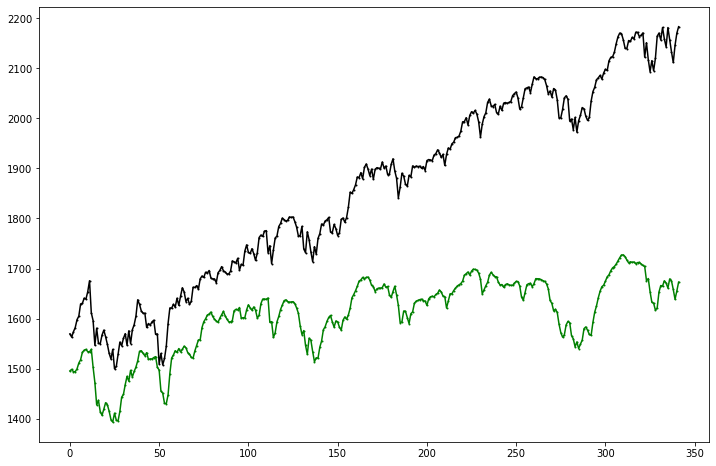

In [183]:

input_T ,real = data.make_windows(data.test_dataset)
predictions = test_model.predict(input_T)

list_a = [i for i in real[:,0,0]]

list_real = [i*data.train_std['Close']+data.train_mean['Close'] for i in list_a]

list_a = [i for i in predictions[:,0,0]]

list_predict = [i*data.train_std['Close']+data.train_mean['Close'] for i in list_a]

plt.plot(list_real, color="black",label=f"real", marker='o', ms=1)
plt.plot(list_predict, color="green",label=f"predicted", marker='o', ms=1)